In this notebook I will extract hourly wind data of Tromsøflaket from met.no

client ID: 013cae58-0a1e-4921-8131-5a3875e54cd3

secret client: 43e48ef1-9434-4616-b8fa-33c019c3a115

In [31]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
%matplotlib inline

# Insert your own client ID here`
client_id = '013cae58-0a1e-4921-8131-5a3875e54cd3'

In [32]:
sns.set_theme(style="darkgrid")
sns.color_palette("viridis", as_cmap=True)
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black'}

# Get data from met.no

https://frost.met.no/python_example.html

In [2]:
# Define endpoint and parameters
endpoint = 'https://frost.met.no/observations/v0.jsonld'
parameters = {
    'sources': 'SN90720:0',
    'elements': 'wind_speed',
    'referencetime': '2018-06-20/2018-06-30',
}
# Issue an HTTP GET request
r = requests.get(endpoint, parameters, auth=(client_id,''))
# Extract JSON data
json = r.json()

In [3]:
# Check if the request worked, print out any errors
if r.status_code == 200:
    data = json['data']
    print('Data retrieved from frost.met.no!')
else:
    print('Error! Returned status code %s' % r.status_code)
    print('Message: %s' % json['error']['message'])
    print('Reason: %s' % json['error']['reason'])

Data retrieved from frost.met.no!


In [4]:
# This will return a Dataframe with all of the observations in a table format
df = pd.DataFrame()
for i in range(len(data)):
    row = pd.DataFrame(data[i]['observations'])
    row['referenceTime'] = data[i]['referenceTime']
    row['sourceId'] = data[i]['sourceId']
    df = df.append(row)

df = df.reset_index()

In [5]:
df.head()


,index,elementId,value,unit,level,timeOffset,timeResolution,timeSeriesId,performanceCategory,exposureCategory,qualityCode,referenceTime,sourceId
0,0,wind_speed,3.5,m/s,"{'levelType': 'height_above_ground', 'unit': '...",PT0H,PT1H,0,C,2,6,2018-06-20T00:00:00.000Z,SN90720:0
1,0,wind_speed,5.2,m/s,"{'levelType': 'height_above_ground', 'unit': '...",PT0H,PT1H,0,C,2,6,2018-06-20T01:00:00.000Z,SN90720:0
2,0,wind_speed,5.1,m/s,"{'levelType': 'height_above_ground', 'unit': '...",PT0H,PT1H,0,C,2,6,2018-06-20T02:00:00.000Z,SN90720:0
3,0,wind_speed,5.8,m/s,"{'levelType': 'height_above_ground', 'unit': '...",PT0H,PT1H,0,C,2,6,2018-06-20T03:00:00.000Z,SN90720:0
4,0,wind_speed,5.7,m/s,"{'levelType': 'height_above_ground', 'unit': '...",PT0H,PT1H,0,C,2,6,2018-06-20T04:00:00.000Z,SN90720:0


In [26]:
columns = ['referenceTime','value']
df2 = df[columns].copy()
df2.referenceTime = pd.to_datetime(df2['referenceTime'])

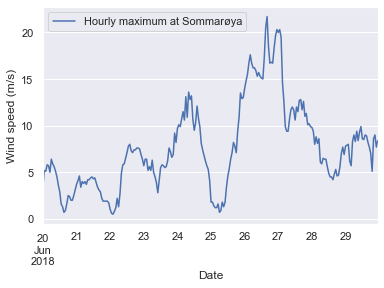

In [39]:
df2.plot(x='referenceTime')
plt.ylabel('Wind speed (m/s)')
plt.xlabel('Date')
plt.legend(['Hourly maximum at Sommarøya'])

In [38]:
datetime.timestamp(df2.referenceTime[0])

TypeError: descriptor 'timestamp' requires a 'datetime.datetime' object but received a 'str'